In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pylab as py

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/REKDAT/globalterrorismdb_0718dist.csv'
df = pd.read_csv(path, encoding="ISO-8859-1")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [ ]:
df['eventid']

0         197000000001
1         197000000002
2         197001000001
3         197001000002
4         197001000003
5         197001010002
6         197001020001
7         197001020002
8         197001020003
9         197001030001
10        197001050001
11        197001060001
12        197001080001
13        197001090001
14        197001090002
15        197001100001
16        197001110001
17        197001120001
18        197001120002
19        197001130001
20        197001140001
21        197001150001
22        197001190002
23        197001190003
24        197001190004
25        197001200001
26        197001210001
27        197001220001
28        197001220002
29        197001250001
              ...     
181661    201712300019
181662    201712300020
181663    201712300021
181664    201712300022
181665    201712300023
181666    201712300025
181667    201712300026
181668    201712310001
181669    201712310002
181670    201712310003
181671    201712310004
181672    201712310005
181673    2

#Data Cleaning
Disini kita akan mencoba mencari outlier di beberapa atribut yang ada

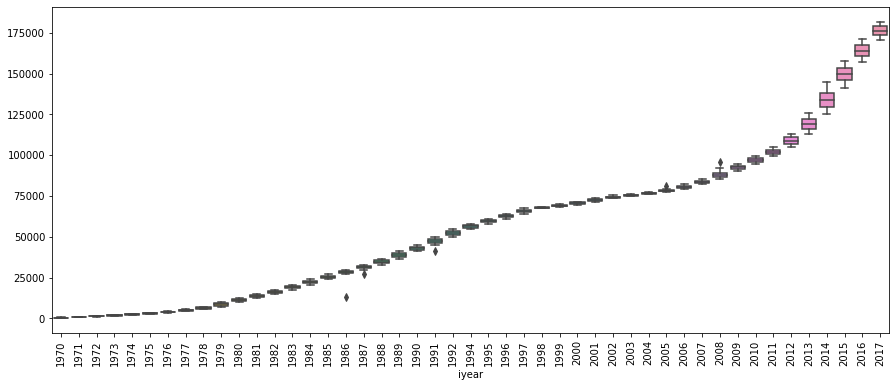

In [ ]:
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(data=df, y=df['nkill'].index, x = 'iyear')
plt.show()

Boxplot diatas memberikan kita petunjuk jika ada beberapa outlier dalam konteks jumlah korban pada tiap tahun, mari kita fokus ke tahun 1986 karena sepertinya outlier di 1986 paling jauh relatif ke distribusi nya jika dibandingkan dengan tahun lain

In [ ]:
df_1986_sorted = df[(df['iyear'] == 1986)].sort_values(by='nkill', ascending=False)
df_1986_sorted['nkill']

27086    240.0
28561    227.0
27413     75.0
29812     62.0
27589     46.0
28200     45.0
27430     44.0
28579     41.0
29822     40.0
27344     40.0
27472     40.0
29460     36.0
29641     34.0
28790     33.0
28710     31.0
29498     30.0
28125     30.0
27237     30.0
27145     28.0
29662     27.0
29513     27.0
28870     25.0
27076     25.0
27542     25.0
27794     25.0
28062     25.0
29638     24.0
27550     23.0
29401     22.0
29484     22.0
         ...  
29595      NaN
29626      NaN
29634      NaN
29660      NaN
29666      NaN
29669      NaN
29686      NaN
29688      NaN
29700      NaN
29702      NaN
29703      NaN
29704      NaN
29719      NaN
29720      NaN
29721      NaN
29722      NaN
29723      NaN
29732      NaN
29734      NaN
29735      NaN
29736      NaN
29737      NaN
29738      NaN
29739      NaN
29740      NaN
29787      NaN
29791      NaN
29798      NaN
29800      NaN
29835      NaN
Name: nkill, Length: 2860, dtype: float64

In [ ]:
df.iloc[27086]

eventid                                 198601130005
iyear                                           1986
imonth                                             1
iday                                              13
approxdate                                       NaN
extended                                           0
resolution                                       NaN
country                                          137
country_txt                               Mozambique
region                                            11
region_txt                        Sub-Saharan Africa
provstate                                     Sofala
city                                        Marromeu
latitude                                  -18.293199
longitude                                  35.939217
specificity                                      1.0
vicinity                                           0
location                                         NaN
summary                                       

Terlihat dari informasi diatas bahwa serangan dengan jumlah korban yang cukup banyak ini terjadi di Mozambik di tahun 1986. Jika kita telaah lebih lanjut, sumber internet menunjukkan bila pada tahun tersebut, Mozambik sedang mengalami Perang Sipil. Hal inilah yang kemungkinan besar menyebabkan adanya outlier di jumlah korban tersebut dibanding tahun lain.
Washington post :
https://www.washingtonpost.com/archive/politics/1986/05/12/war-of-attrition-hits-mozambiques-poor/3b7599e3-75d0-410f-ba1a-6498d2cb587b/
Wikipedia :
https://en.wikipedia.org/wiki/Mozambican_Civil_War

Row ini bisa kita drop dengan cara berikut

In [ ]:
df = df.drop(df[(df['eventid'] == 198601130005)].index)

In [ ]:
df.iloc[28561]

eventid                198607010011
iyear                          1986
imonth                            7
iday                              1
approxdate                      NaN
extended                          0
resolution                      NaN
country                          92
country_txt                   India
region                            6
region_txt               South Asia
provstate                    Punjab
city                      Jalandhar
latitude                  31.326015
longitude                 75.576183
specificity                     1.0
vicinity                          0
location                        NaN
summary                         NaN
crit1                             1
crit2                             1
crit3                             1
doubtterr                      -9.0
alternative                     NaN
alternative_txt                 NaN
multiple                        0.0
success                           0
suicide                     

In [ ]:
df = df.drop(df[(df['eventid'] == 198607010011)].index)
df = df.drop(df[(df['eventid'] == 198607010012)].index)

In [ ]:
df.iloc[28561]

eventid                198607010013
iyear                          1986
imonth                            7
iday                              1
approxdate                      NaN
extended                          0
resolution                      NaN
country                         159
country_txt                    Peru
region                            3
region_txt            South America
provstate                Lambayeque
city                     Santa Rosa
latitude                  -6.875968
longitude                -79.922097
specificity                     1.0
vicinity                          0
location                        NaN
summary                         NaN
crit1                             1
crit2                             1
crit3                             1
doubtterr                       0.0
alternative                     NaN
alternative_txt                 NaN
multiple                        0.0
success                           1
suicide                     

In [ ]:
df_1986_sorted_2 = df[(df['iyear'] == 1986)].sort_values(by='nkill', ascending=False)
df_1986_sorted_2['nkill']

28561    227.0
27413     75.0
29812     62.0
27589     46.0
28200     45.0
27430     44.0
28579     41.0
29822     40.0
27344     40.0
27472     40.0
29460     36.0
29641     34.0
28790     33.0
28710     31.0
29498     30.0
27237     30.0
28125     30.0
27145     28.0
29662     27.0
29513     27.0
28870     25.0
27076     25.0
27542     25.0
28062     25.0
27794     25.0
29638     24.0
27550     23.0
28399     22.0
29484     22.0
29401     22.0
         ...  
29595      NaN
29626      NaN
29634      NaN
29660      NaN
29666      NaN
29669      NaN
29686      NaN
29688      NaN
29700      NaN
29702      NaN
29703      NaN
29704      NaN
29719      NaN
29720      NaN
29721      NaN
29722      NaN
29723      NaN
29732      NaN
29734      NaN
29735      NaN
29736      NaN
29737      NaN
29738      NaN
29739      NaN
29740      NaN
29787      NaN
29791      NaN
29798      NaN
29800      NaN
29835      NaN
Name: nkill, Length: 2856, dtype: float64

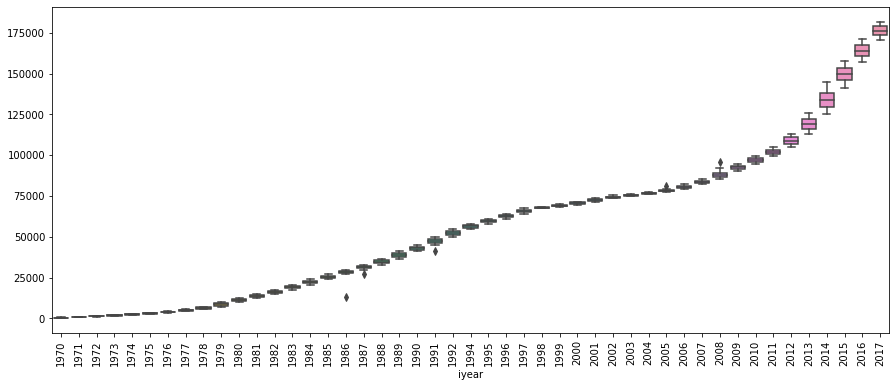

In [ ]:
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
sns.boxplot(data=df, y=df['nkill'].index, x = 'iyear')
plt.show()

Selanjutnya kita lihat heatmap untuk correlation

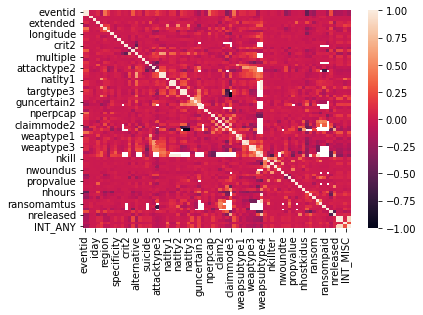

In [ ]:
correlation = df.corr()
sns.heatmap(correlation)

#Data Cleaning
Kita akan drop columns jika column tersebut memiliki jumlah nilai null yang banyak, Disini saya pakai jumlah null 3000 sebagai batas, sebenarnya bisa dirubah, namun 3000 sepertinya angka ideal setelah beberapa percobaan.

In [ ]:
pd.options.display.min_rows = 135
df.isnull().sum().sort_values(ascending=False)

gsubname3           181669
weapsubtype4_txt    181619
weapsubtype4        181619
weaptype4           181616
weaptype4_txt       181616
claimmode3          181556
claimmode3_txt      181556
gsubname2           181529
claim3              181371
guncertain3         181369
gname3              181365
divert              181365
attacktype3         181261
attacktype3_txt     181261
ransomnote          181175
ransompaidus        181137
ransomamtus         181126
claimmode2          181073
claimmode2_txt      181073
ransompaid          180915
corp3               180663
targsubtype3        180592
targsubtype3_txt    180592
natlty3_txt         180542
natlty3             180542
target3             180514
targtype3           180513
targtype3_txt       180513
ransomamt           180339
weapsubtype3_txt    179996
                     ...  
multiple                 1
crit1                    0
iyear                    0
iday                     0
imonth                   0
targtype1_txt            0
g

#Data Reduction
kita akan mengurangi jumlah column yang ada

In [ ]:
df_new = df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3000)], axis=1)
df_new
#Ini artinya kita akan drop columns, dimana df.columns menjadi tujuannya, dan kita hanya akan tertarik
#ke columns tertentu, yang dijalankan dengan .apply, ke Axis = 1 (axis column)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,individual,weaptype1,weaptype1_txt,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0,13,Unknown,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0,13,Unknown,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,13,Unknown,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0,6,Explosives,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0,8,Incendiary,1,0.0,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,0,5,Firearms,1,0.0,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,0,5,Firearms,0,0.0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,California,...,0,6,Explosives,1,0.0,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0,8,Incendiary,1,0.0,Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,Wisconsin,...,0,8,Incendiary,1,0.0,Hewitt Project,0,0,0,0


Dibawah ini kita bisa lihat heatmap untuk korelasi yang baru, dan ini sedikit lebih uniform jika dibandingkan yang pertama. Namun disini ada trade off, yakni column nkill yang memiliki korelasi cukup tinggi dengan atribut lain akan terhapus, karena ia memiliki jumlah null yang cukup banyak (~10.000)

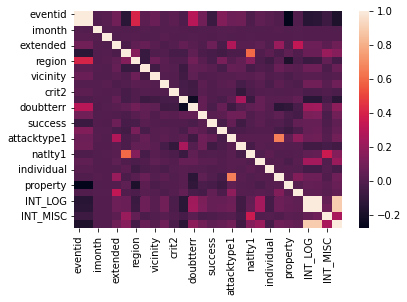

In [ ]:
correlation_new = df_new.corr()
sns.heatmap(correlation_new)